Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


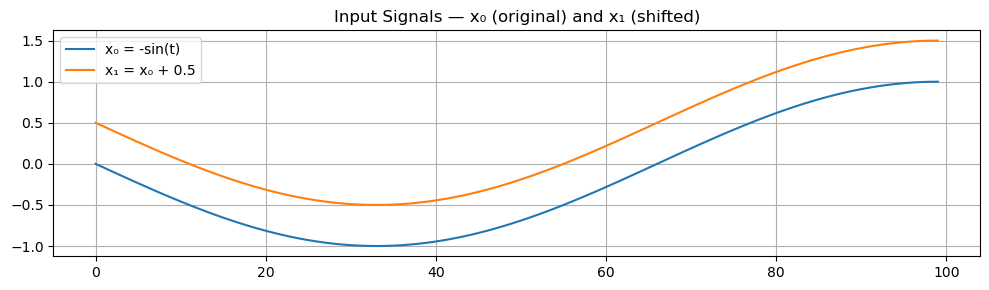

Evaluating NOT


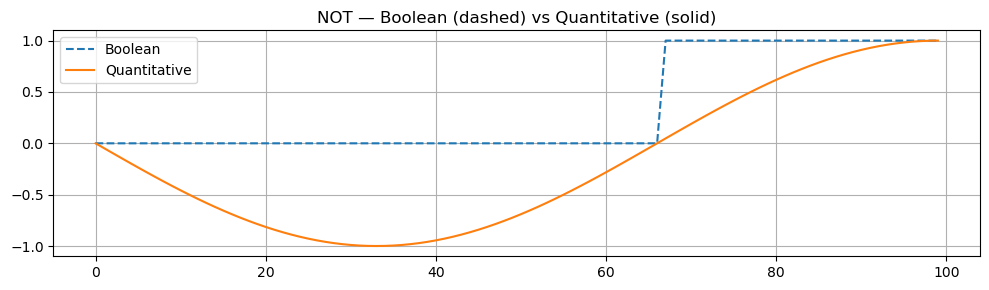

Evaluating AND


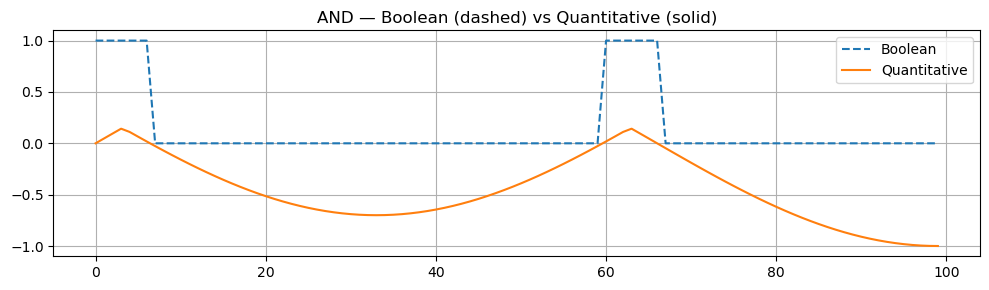

Evaluating OR


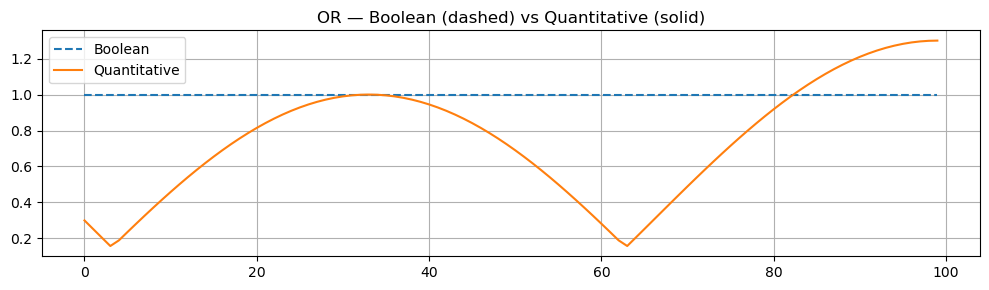

Evaluating EVENTUALLY


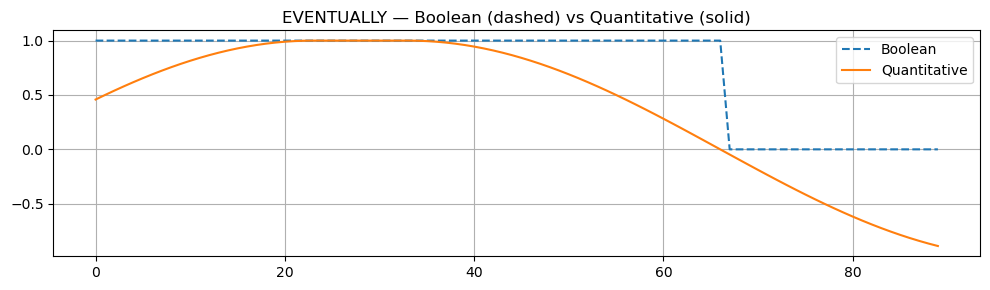

Evaluating GLOBALLY


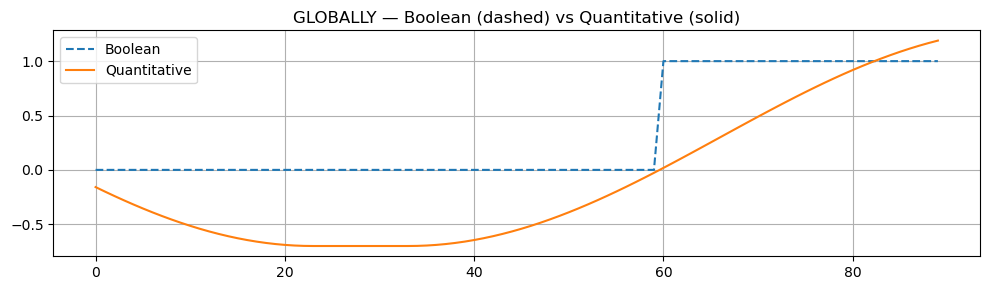

Evaluating UNTIL


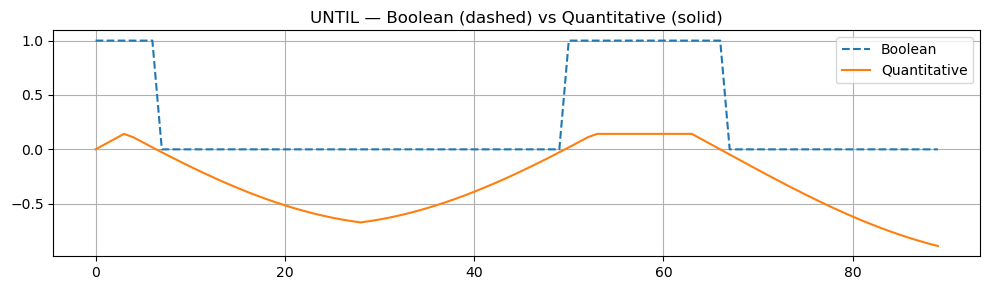

Evaluating SINCE


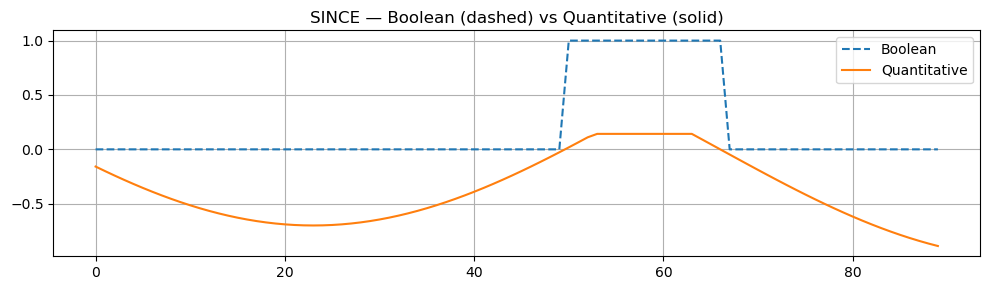

Evaluating REACH


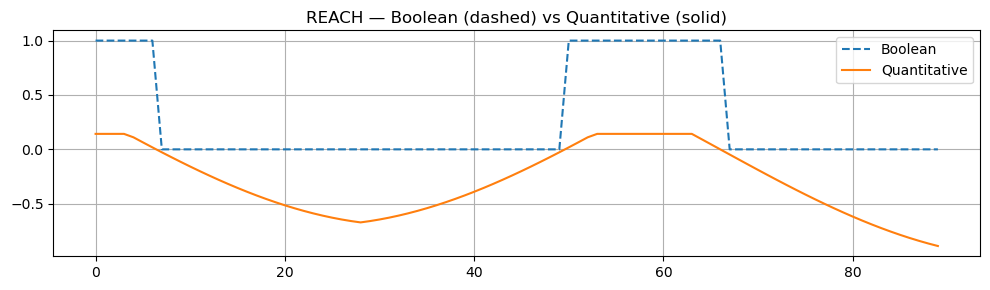

Evaluating ESCAPE


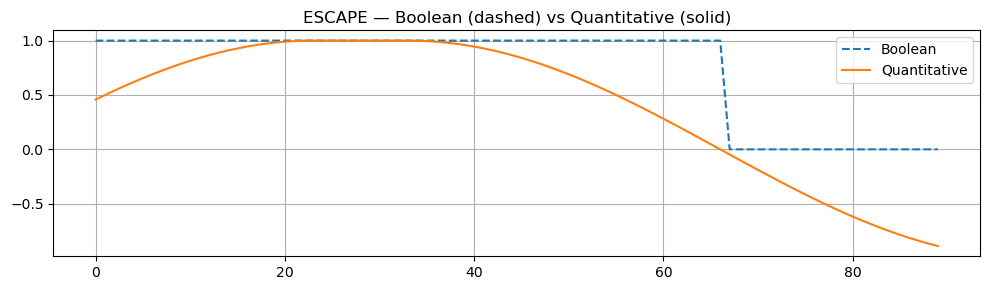

In [1]:
import torch
import math
import matplotlib.pyplot as plt
from torcheck.stl import (Atom, Not, And, Or, Eventually, Globally, Until, Since, Reach, Escape)

# Create a signal: -sin(x) over [0, 3/2 * pi]
T = 100
t_vals = torch.linspace(0, 1.5 * math.pi, T)
signal = -torch.sin(t_vals).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, T)

# Add a second signal to test binary operators
x = torch.cat([signal, signal + 0.5], dim=1)  # Shape: (1, 2, T)

# Define atomic predicates
atom1 = Atom(var_index=0, threshold=0.0, lte=True)     # x₀ <= 0
atom2 = Atom(var_index=1, threshold=0.2, lte=False)    # x₁ > 0.2

# Define STL and spatial formulas
formulas = {
    "NOT": Not(atom1),
    "AND": And(atom1, atom2),
    "OR": Or(atom1, atom2),
    "EVENTUALLY": Eventually(atom1, left_time_bound=0, right_time_bound=10),
    "GLOBALLY": Globally(atom2, left_time_bound=0, right_time_bound=10),
    "UNTIL": Until(atom1, atom2, left_time_bound=0, right_time_bound=10),
    "SINCE": Since(atom2, atom1, left_time_bound=0, right_time_bound=10),
    "REACH": Reach(atom1, atom2, left_distance_bound=0, right_distance_bound=10),
    "ESCAPE": Escape(atom1, left_distance_bound=0, right_distance_bound=10)
}

def eval_and_plot(node, label):
    print(f"Evaluating {label}")
    bool_result = node.boolean(x, evaluate_at_all_times=True).squeeze().numpy()
    quant_result = node.quantitative(x, evaluate_at_all_times=True).squeeze().numpy()

    plt.figure(figsize=(10, 3))
    plt.title(f"{label} — Boolean (dashed) vs Quantitative (solid)")
    plt.plot(bool_result, label="Boolean", linestyle='--')
    plt.plot(quant_result, label="Quantitative")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Plot original signals x0 and x1
    plt.figure(figsize=(10, 3))
    plt.title("Input Signals — x₀ (original) and x₁ (shifted)")
    plt.plot(signal.squeeze().numpy(), label="x₀ = -sin(t)")
    plt.plot((signal + 0.5).squeeze().numpy(), label="x₁ = x₀ + 0.5")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    for label, node in formulas.items():
        eval_and_plot(node, label)

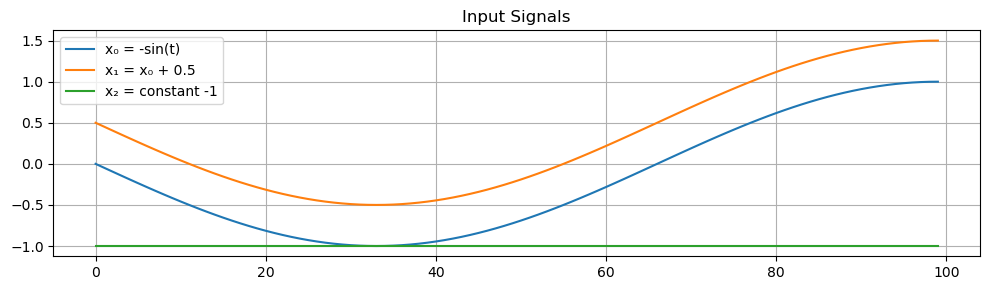

Evaluating REACH [0,10]


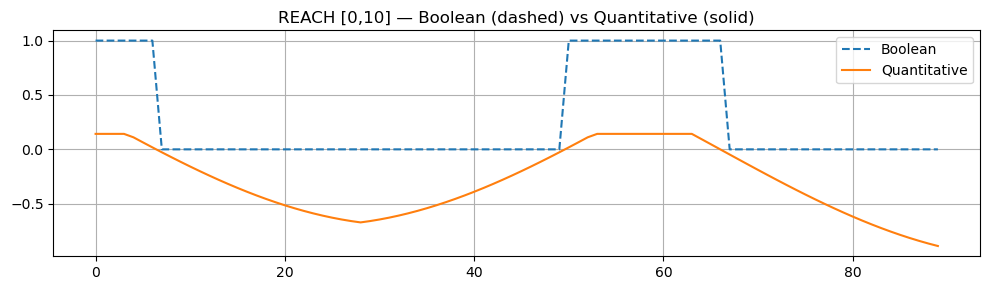

Evaluating ESCAPE [0,10]


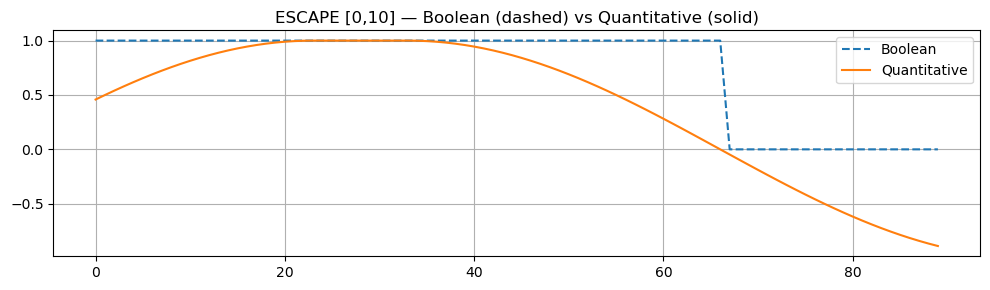

Evaluating REACH unbounded


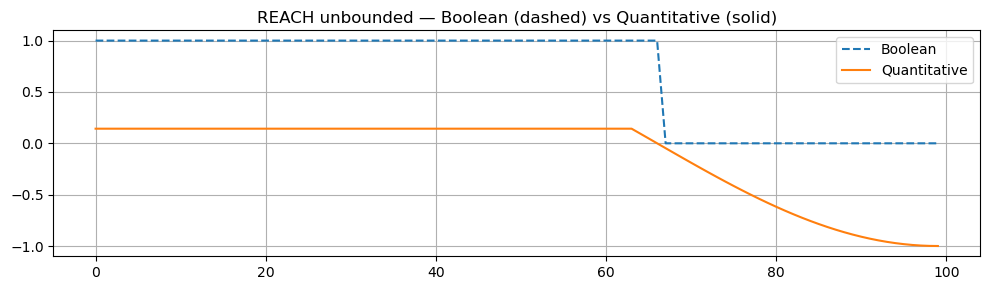

Evaluating ESCAPE unbounded


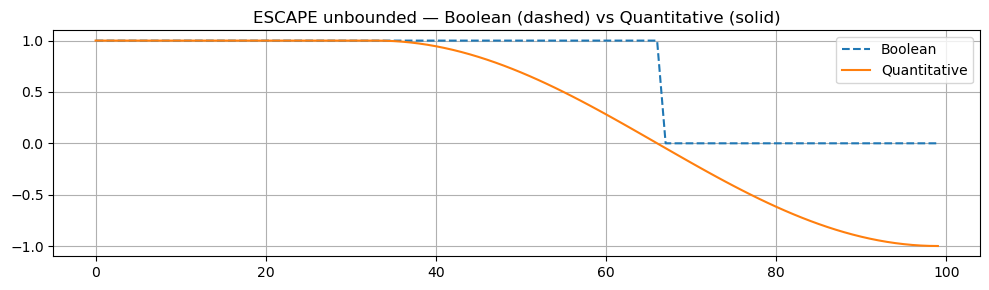

Evaluating REACH right-unbounded


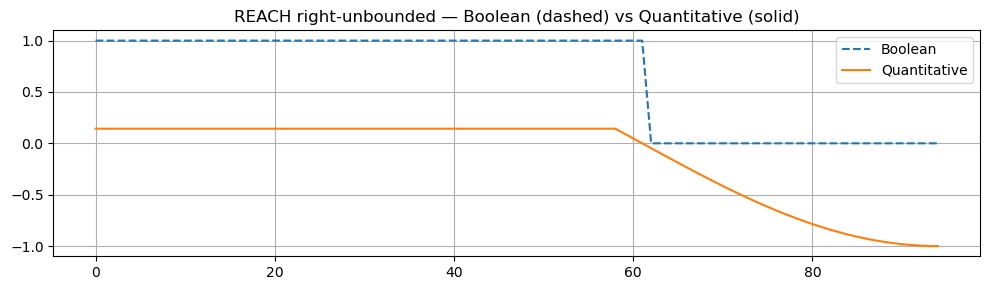

Evaluating ESCAPE right-unbounded


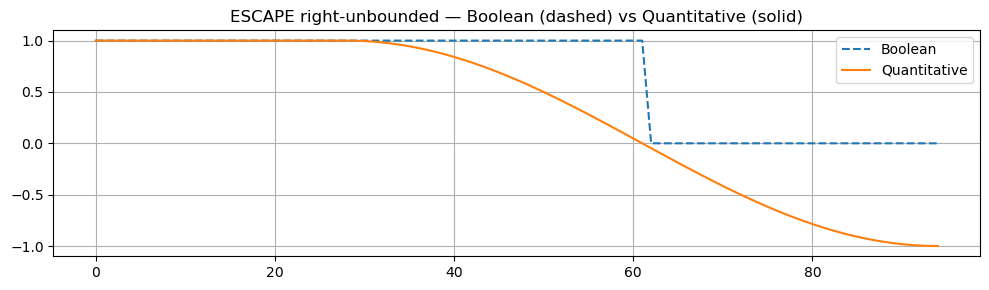

Evaluating REACH unsat


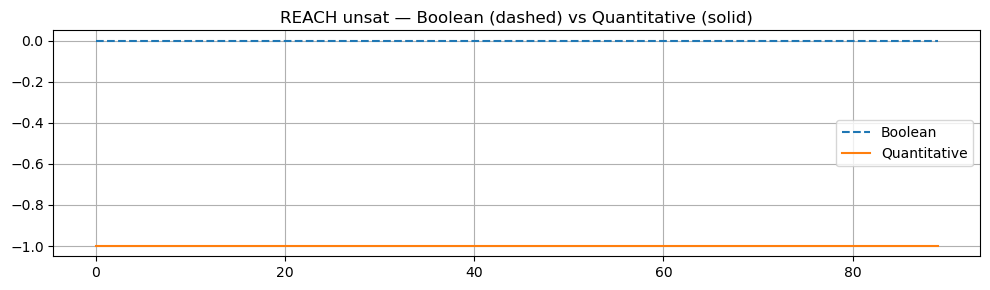

Evaluating ESCAPE unsat


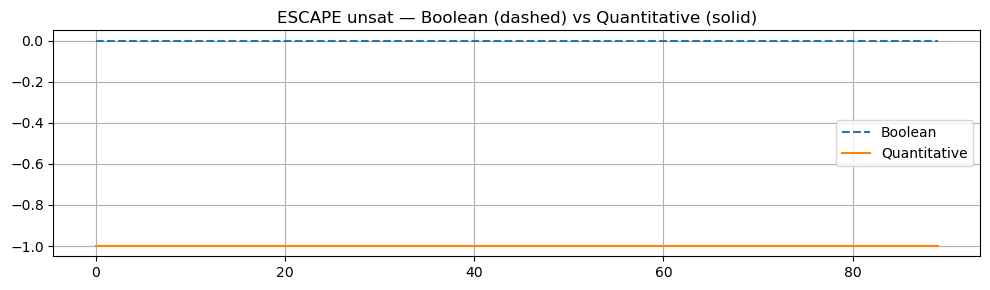

Evaluating REACH [0,0]


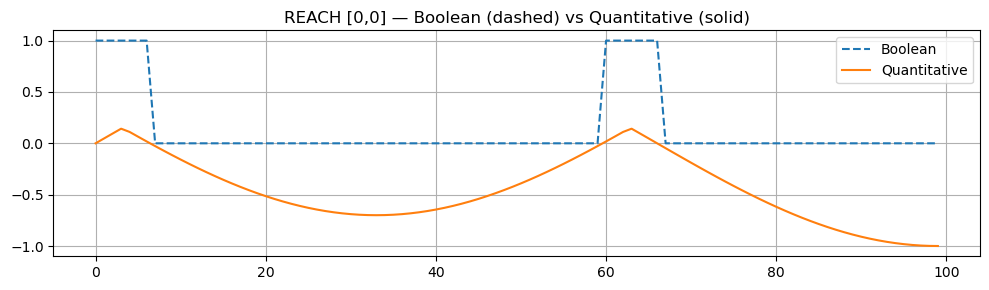

Evaluating ESCAPE [0,0]


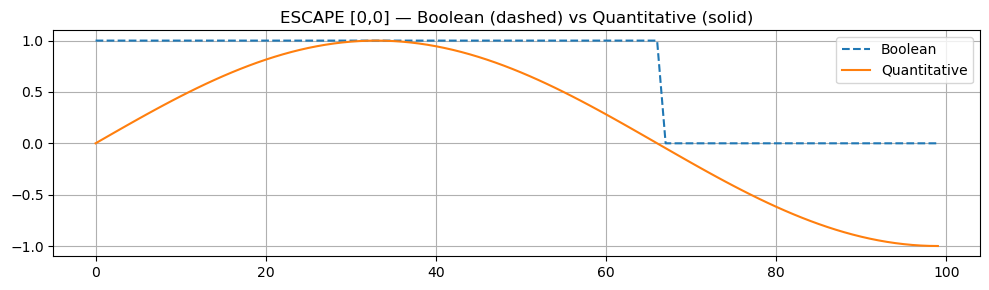

In [2]:
import torch
import math
import matplotlib.pyplot as plt
from torcheck.stl import (
    Atom, Not, And, Or, Eventually, Globally, Until, Since, Reach, Escape
)

T = 100
pi = math.pi

# Time values and signals
t_vals = torch.linspace(0, 1.5 * pi, T)
signal_base = -torch.sin(t_vals).unsqueeze(0).unsqueeze(0)  # (1, 1, T)

# Alternate signals
constant_false = torch.full_like(signal_base, -1.0)  # always false for atom >= 0
constant_true = torch.full_like(signal_base, 1.0)     # always true for atom <= 2

# Combine into multi-variate signal: x0, x1, x2
x = torch.cat([signal_base, signal_base + 0.5, constant_false], dim=1)  # (1, 3, T)

# Define atomic predicates
atom0 = Atom(var_index=0, threshold=0.0, lte=True)      # x0 <= 0
atom1 = Atom(var_index=1, threshold=0.2, lte=False)     # x1 > 0.2
atom2 = Atom(var_index=2, threshold=0.0, lte=False)     # x2 > 0 (always false)

# Define test formulas
formulas = {
    # Standard case (as before)
    "REACH [0,10]": Reach(atom0, atom1, left_distance_bound=0, right_distance_bound=10),
    "ESCAPE [0,10]": Escape(atom0, left_distance_bound=0, right_distance_bound=10),

    # Fully unbounded variants
    "REACH unbounded": Reach(atom0, atom1, unbound=True),
    "ESCAPE unbounded": Escape(atom0, unbound=True),

    # Right-unbounded variants
    "REACH right-unbounded": Reach(atom0, atom1, right_unbound=True, left_distance_bound=5),
    "ESCAPE right-unbounded": Escape(atom0, right_unbound=True, left_distance_bound=5),

    # Infeasible REACH and ESCAPE (atom2 always false)
    "REACH unsat": Reach(atom0, atom2, left_distance_bound=0, right_distance_bound=10),
    "ESCAPE unsat": Escape(atom2, left_distance_bound=0, right_distance_bound=10),

    # Zero-width interval (only test immediate time)
    "REACH [0,0]": Reach(atom0, atom1, left_distance_bound=0, right_distance_bound=0),
    "ESCAPE [0,0]": Escape(atom0, left_distance_bound=0, right_distance_bound=0),
}

def eval_and_plot(node, label):
    print(f"Evaluating {label}")
    bool_result = node.boolean(x, evaluate_at_all_times=True).squeeze().numpy()
    quant_result = node.quantitative(x, evaluate_at_all_times=True).squeeze().numpy()

    plt.figure(figsize=(10, 3))
    plt.title(f"{label} — Boolean (dashed) vs Quantitative (solid)")
    plt.plot(bool_result, label="Boolean", linestyle='--')
    plt.plot(quant_result, label="Quantitative")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plt.figure(figsize=(10, 3))
    plt.title("Input Signals")
    plt.plot(x[0, 0], label="x₀ = -sin(t)")
    plt.plot(x[0, 1], label="x₁ = x₀ + 0.5")
    plt.plot(x[0, 2], label="x₂ = constant -1")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    for label, node in formulas.items():
        eval_and_plot(node, label)